### 加载数据

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

### 数据预处理

In [2]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### PCA降维

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

### 查看主成分的参数

In [4]:
print("解释的方差比例:", pca.explained_variance_ratio_)
print("累计解释的方差:", sum(pca.explained_variance_ratio_))

print("\n主成分方向(特征向量):")
for i, comp in enumerate(pca.components_):
    print(f"主成分 {i+1}:")
    for feature, value in zip(feature_names, comp):
        print(f"  {feature}: {value:.3f}")

解释的方差比例: [0.72962445 0.22850762]
累计解释的方差: 0.9581320720000164

主成分方向(特征向量):
主成分 1:
  sepal length (cm): 0.521
  sepal width (cm): -0.269
  petal length (cm): 0.580
  petal width (cm): 0.565
主成分 2:
  sepal length (cm): 0.377
  sepal width (cm): 0.923
  petal length (cm): 0.024
  petal width (cm): 0.067


### 可视化结果

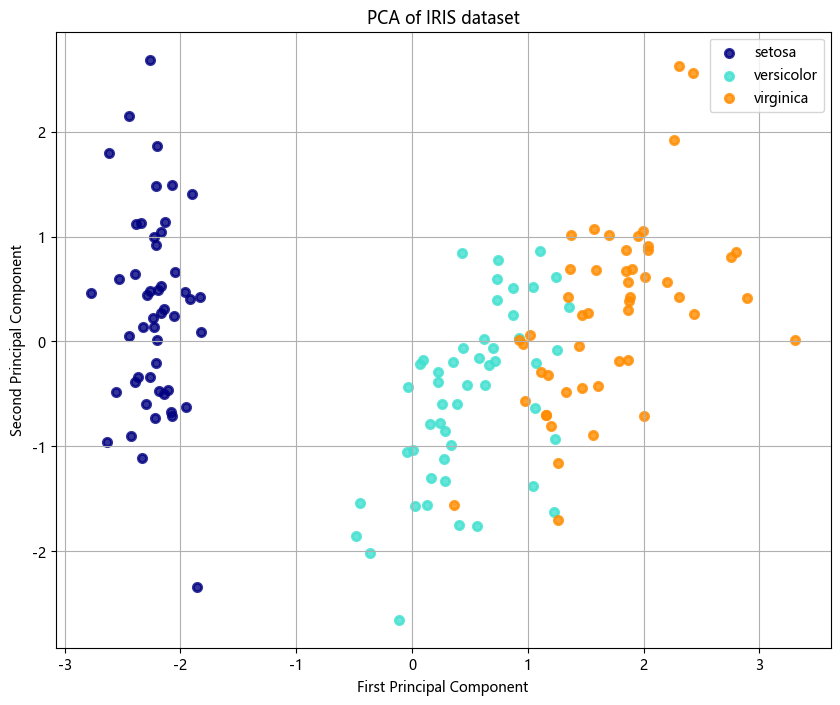

In [5]:
import matplotlib.pyplot as plt

plt.rcParams["font.sans-serif"]=["Microsoft YaHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False
plt.figure(figsize=(10, 8))
colors = ['navy', 'turquoise', 'darkorange']
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=0.8, lw=2,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.grid(True)
plt.show()